### Classification of Happy or Sad Face(s)

In [1]:
#importing libraries

import os, random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from io import BytesIO
from ipywidgets import widgets

In [2]:
dir = "happy-or-sad\\data"

print(f"Sub folders under directory: {os.listdir(dir)}")

happy_dir = os.path.join(dir, "happy")
sad_dir = os.path.join(dir, "sad")

happy_files = os.listdir(happy_dir)
sad_files = os.listdir(sad_dir)

print(f"First 5 happy files: {happy_files[:5]}")
print(f"First 5 sad files: {sad_files[:5]}")

Sub folders under directory: ['happy', 'sad']
First 5 happy files: ['05-12-21-happy-people.jpg', '10-Habits-of-Happy-People-Seniors-Today.jpg', '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg', '11-Habits-of-Truly-Happy-People.jpg', '154006829.jpg']
First 5 sad files: ['0x0.jpg', '1000_F_221688877_urf6uWWBdLW3PVc8iBOrKuL4EfNlUg3F.jpg', '14HRhniN7B7Fqx5GCoFpQ3A.jpeg', '1800x1200_visual_guide_to_seasonal_affective_disorder_sad_slideshow.jpg', '21-214455_sad-person-png-transparent-sad-person-png-png.png']


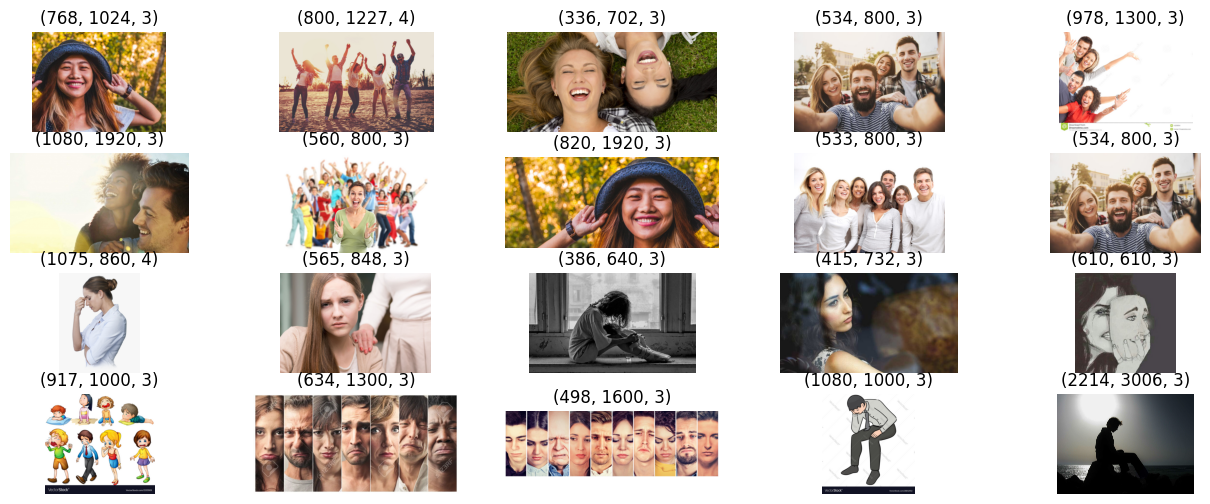

In [3]:
#visualizing some happy and sad pictures

plt.subplots(4,5, figsize=(16,6))
for i in range(10):
    plt.subplot(4,5,i+1)
    random_file = random.choice(happy_files)
    random_path_file = os.path.join(happy_dir, random_file)
    img = mpimg.imread(random_path_file)
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis("off")

for i in range(10):
    plt.subplot(4,5,i+11)
    random_file = random.choice(sad_files)
    random_path_file = os.path.join(sad_dir, random_file)
    img = mpimg.imread(random_path_file)
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis("off")   

In [4]:
#defiing the model

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 566,465 (2.16 MB)

 Trainable params: 566,465 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#compiling model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
loss="binary_crossentropy",
metrics=['accuracy'])

In [6]:
#training dataset

training_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=dir,
    image_size=(300, 300),
    batch_size=32,
    label_mode="binary"
)

Found 168 files belonging to 2 classes.


In [7]:
#rescaling layer
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

#mapping with images to rescale

training_dataset_rescale = training_dataset.map(lambda image, label :(rescale_layer(image), label))

#applying cache, prefetch and shuffle

training_dataset_final = (training_dataset_rescale
.cache()
.shuffle(100)
.prefetch(tf.data.AUTOTUNE)
)

In [8]:
#model training without callbacks

# history = model.fit(training_dataset_final,
# epochs=15,
# verbose=1)

In [9]:
#implementing call backs for earlystopping

class Earlystopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] > 0.96:
            print("\nAccuracy reached 96%, hence stopping training..")
            self.model.stop_training=True

#object of class
early_stopping = Earlystopping()            


In [10]:
#model training with callbacks

history = model.fit(training_dataset_final,
epochs=30,
callbacks=[early_stopping],
verbose=1)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.5774 - loss: 0.6920
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.5417 - loss: 0.6815
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.6131 - loss: 0.6364
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.6548 - loss: 0.5804
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7738 - loss: 0.5268
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.7381 - loss: 0.5213
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7976 - loss: 0.4785
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.7679 - loss: 0.4883
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.7976 - loss: 0.4078
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8214 - loss: 0.3675
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8750 - loss: 0.2775
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9167 - lo

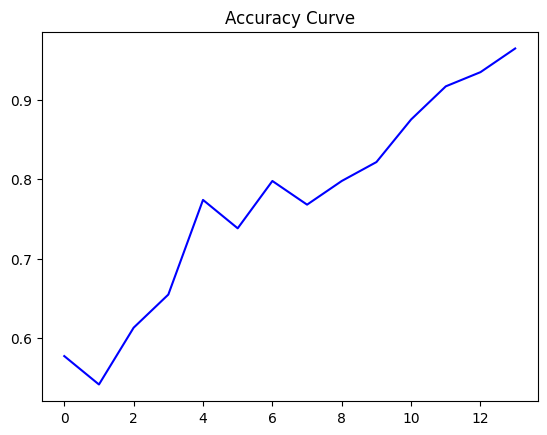

In [11]:
#plotting accuracy curve

epochs=range(len(history.history['accuracy']))
accuracy = history.history['accuracy']

plt.plot(epochs, accuracy, "b", label="training_accuracy")
plt.title("Accuracy Curve")
plt.show()


In [14]:
#Model Prediction

uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_prediction(filename, file, out):

    img = tf.keras.utils.load_img(file, target_size=(300, 300))
    img = tf.keras.utils.img_to_array(img)
    img = rescale_layer(img)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, verbose=False)[0][0]
    print(prediction)

    with out:
        if prediction >= 0.5:
            print(f"{filename} is a sad mood")
        else:
            print(f"{filename} is a happy mood")    

def on_upload_change(change):
    items = change.new

    for item in items:
        file_jpg = BytesIO(item.content)  
        file_prediction(item.name, file_jpg, out)

uploader.observe(on_upload_change, names="value")                  

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()